# South African Language Identification

### EDSA 2022 Classification Hackathon

**Name: Edward Ogbei**

**Date: March 30, 2022**

**Academy: Explore Data Science Academy**

## 1. Overview
South Africa is a multicultural society that is characterised by its rich linguistic diversity. Language is an indispensable tool that can be used to deepen democracy and also contribute to the social, cultural, intellectual, economic and political life of the South African society.

The country is multilingual with 11 official languages, each of which is guaranteed equal status. Most South Africans are multilingual and able to speak at least two or more of the official languages.
From South African Government
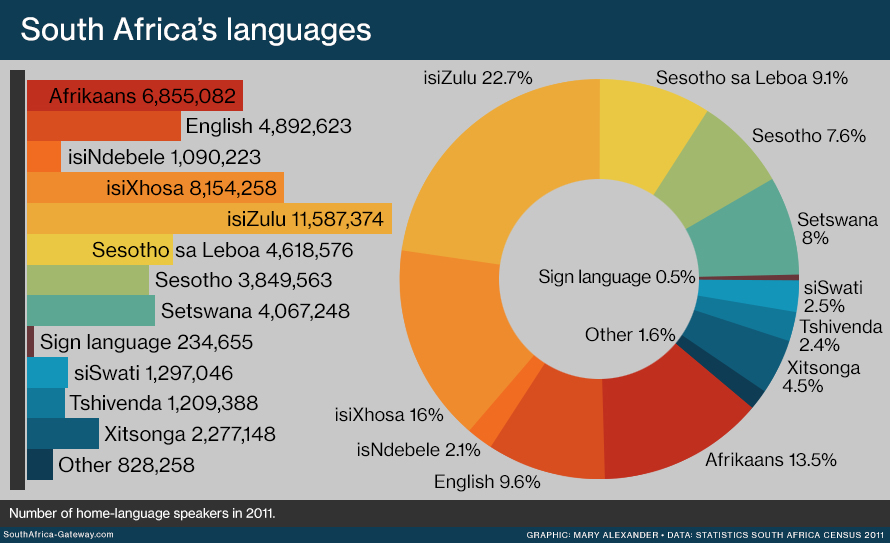

With such a multilingual population, it is only obvious that our systems and devices also communicate in multi-languages.

In this challenge, you will take text which is in any of South Africa's 11 Official languages and identify which language the text is in. This is an example of NLP's Language Identification, the task of determining the natural language that a piece of text is written in.


## 2. Loading Libraries & Dependencies

In [9]:
import numpy as np        # Fundamental package for linear algebra and multidimensional arrays
import pandas as pd       # Data analysis and manipulation tool

import requests
import io

# Importing modules for data science and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import timeit
import seaborn as sns
import time
import pickle



# Quality of all figures in notebook
mpl.rcParams['figure.dpi'] = 180

# NLP Libraries
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter

# ML Libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import pos_tag

# Model Evaluation Packages
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from sklearn.metrics import make_scorer
from sklearn.datasets import make_classification
from sklearn.metrics import f1_score

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Modelling
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn import metrics
#Panda Profiling for EDA
from pandas_profiling import ProfileReport


In [10]:
#download libraries
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
sns.set_style('whitegrid')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Edward\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Edward\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### 3. Dataset Collection

In [11]:
train_set = pd.read_csv('train_set.csv')
train_set.head(15)

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...
5,nso,dinyakišišo tše tša go dirwa gabedi ka ngwaga ...
6,tsn,kgetse nngwe le nngwe e e sa faposiwang mo tsh...
7,ven,mbadelo dze dza laelwa dzi do kwama mahatulele...
8,nso,maloko a dikhuduthamaga a ikarabela mongwe le ...
9,tsn,fa le dirisiwa lebone le tshwanetse go bontsha...


In [12]:
test_set = pd.read_csv('test_set.csv')
test_set.head(15)

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.
5,6,"Ke feela dilense tše hlakilego, tša pono e tee..."
6,7,<fn>(762010101403 AM) 1495 Final Gems Birthing...
7,8,Ntjhafatso ya konteraka ya mosebetsi: Etsa bon...
8,9,u-GEMS uhlinzeka ngezinzuzo zemithi yezifo ezi...
9,10,"So, on occasion, are statistics misused."


### 4. Exploratory Data Analysis

In [15]:
# EDA using Pandas Profiling Report
profile = ProfileReport(train_set, title="Pandas Profiling Report")
profile

Render HTML: 100%|██████████| 1/1 [00:00<00:00,  9.78it/s]


### 5. Data Visualisation

Common spoken words in South Africa

In [16]:
#convert the test to numerical values 
cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(train_set.text)

sum_words = words.sum(axis=0)
#create a frequency of most occuring words
words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
#create a dataframe of the words and frequency 
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = '#440154')
plt.title("Train : Most Frequently Occuring Words - Top 30",size=15)

Text(0.5, 1.0, 'Train : Most Frequently Occuring Words - Top 30')

In [17]:
words_freq

[('ya', 28245),
 ('le', 21204),
 ('ka', 18190),
 ('na', 11218),
 ('die', 10059),
 ('wa', 10052),
 ('ba', 8849),
 ('ho', 8399),
 ('ku', 8386),
 ('nga', 6947),
 ('ke', 5805),
 ('di', 5519),
 ('sa', 4975),
 ('ha', 4861),
 ('tsa', 4830),
 ('se', 4825),
 ('van', 4723),
 ('vha', 4659),
 ('mo', 4098),
 ('hi', 4019),
 ('la', 3727),
 ('en', 3715),
 ('tse', 3636),
 ('kha', 3215),
 ('ga', 2888),
 ('tša', 2870),
 ('eka', 2711),
 ('gore', 2599),
 ('yo', 2412),
 ('afrika', 2404),
 ('tla', 2330),
 ('kanye', 2252),
 ('va', 2250),
 ('te', 2109),
 ('xa', 2038),
 ('ta', 1985),
 ('ukuba', 1947),
 ('wat', 1933),
 ('bona', 1926),
 ('noma', 1899),
 ('word', 1871),
 ('mme', 1776),
 ('kana', 1736),
 ('om', 1729),
 ('ye', 1676),
 ('hore', 1620),
 ('dza', 1596),
 ('tshi', 1541),
 ('nie', 1518),
 ('fa', 1496),
 ('swi', 1491),
 ('uma', 1473),
 ('ri', 1467),
 ('uri', 1456),
 ('bo', 1435),
 ('molao', 1413),
 ('zwa', 1400),
 ('kapa', 1388),
 ('kumbe', 1368),
 ('kutsi', 1333),
 ('ge', 1328),
 ('vir', 1315),
 ('okanye'

In [18]:
#creating a word cloud from the data
wordcloud = WordCloud(background_color = 'white', 
                      width = 800, height = 800).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(4,4))
plt.title("WordCloud - Vocabulary from used In South Africa")
plt.imshow(wordcloud)

### 6. Data Preprocessing

Data Cleaning

In [19]:
working_df = train_set.copy()

In [20]:
#remove rows that are not SA lang
#working_df= working_df.set_index("lang_id")
#working_df = working_df.drop(['today', 'put', 'friend','will'])

Removing noise

In [22]:
def cleaner(working_df):
    """
    this function takes in a dataframe and perform the following:
    -Convert letters to lowercases
    -remove URL links
    -remove # from hashtags
    -remove numbers
    -remove punctuation
    from the text field then return a clean dataframe 
    """
    working_df = working_df.lower()
    to_del = [
        r"@[\w]*",  # strip account mentions
        r"http(s?):\/\/.*\/\w*",  # strip URLs
        r"#\w*",  # strip hashtags
        r"\d+",  # delete numeric values
        r"U+FFFD",  # remove the "character note present" diamond
    ]
    for key in to_del:
        working_df = re.sub(key, "", working_df)
    
    # strip punctuation and special characters
    working_df = re.sub(r"[,.;':@#?!\&/$]+\ *", " ", working_df)
    # strip excess white-space
    working_df = re.sub(r"\s\s+", " ", working_df)
    
    return working_df.lstrip(" ")

In [23]:
working_df['text'] = working_df['text'].apply(cleaner)
test_set['text'] = test_set['text'].apply(cleaner)

In [26]:
working_df.shape

(33000, 2)

In [29]:
test_set.shape

(5682, 2)

In [30]:
working_df.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


Removing Stop Words

In [31]:
stop_word = stopwords.words('english')
working_df['text'] = working_df['text'].apply(lambda x: ' '.join([word for word in x.split() 
                                                                    if word not in (stop_word)]))

Tokenisation

In [32]:
from nltk import TreebankWordTokenizer
tokeniser = TreebankWordTokenizer()

tokeniser = TreebankWordTokenizer()
working_df['tokens'] = working_df['text'].apply(tokeniser.tokenize)
test_set['tokens'] = test_set['text'].apply(tokeniser.tokenize)

Stemming

In [33]:
def stem_text(data):
    text = TreebankWordTokenizer().tokenize(data)
    return ''.join([SnowballStemmer('english').stem(word) for word in data])
working_df['text'] = working_df['text'].apply(lambda x: stem_text(x))
test_set['text'] = test_set['text'].apply(lambda x: stem_text(x))

### 7. Splitting the Data

Text Feature Extraction

In [36]:
y = working_df['lang_id']
X = working_df['text']
# split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)
print("X shape : ", X.shape)
print("y shape : ", y.shape)

X shape :  (33000,)
y shape :  (33000,)


### 8. Building Model

Build Pipeline

In [39]:
from sklearn.pipeline import Pipeline

# Create pipeline for Logistic Regression:
LR = Pipeline([('tfidf', TfidfVectorizer()),('lr', LogisticRegression(random_state=5,
                                  multi_class='ovr',
                                  n_jobs=1, C=1)),])

# Create pipeline for Linear_SVC:
Linear_SVC= Pipeline([('tfidf', TfidfVectorizer()),('linear_svc', LinearSVC(random_state=42)),])


# Create pipeline for RandomForestClassifier:
RF_clf= Pipeline([('tfidf', TfidfVectorizer()),('rf_clf', RandomForestClassifier(n_estimators=100, max_depth=1,
                                     random_state=0, class_weight="balanced")),])

# Create pipeline for KNeighborsClassifier:
K_Near_clf= Pipeline([('tfidf', TfidfVectorizer()),('k_near_clf', KNeighborsClassifier()),])


Training Model

A.Logistic Regression Model

In [40]:
# Model Generation Using Logitic Regression
LR.fit(X_train, y_train)
pred_lr = LR.predict(X_test)

print("Logistic Regression Testing Accuracy Score: ", accuracy_score(y_test, pred_lr))
print("Logistic Regression Training Accuracy Score: ",LR.score(X_train, y_train))
        

Logistic Regression Testing Accuracy Score:  0.9940909090909091
Logistic Regression Training Accuracy Score:  0.9990151515151515


B. Linear SVC Model

In [41]:
# Model Generation Using Linear SVC Classifier
Linear_SVC.fit(X_train, y_train)
pred_Linear_SVC = Linear_SVC.predict(X_test)

print("Linear SVC Testing Accuracy Score: ", accuracy_score(y_test, pred_Linear_SVC))
print("Linear SVC Testing Accuracy Score: ",Linear_SVC.score(X_train, y_train))


Linear SVC Testing Accuracy Score:  0.9975757575757576
Linear SVC Testing Accuracy Score:  1.0


C.  Random Forest Classifier

In [42]:
# Model Generation Using Linear Random Forest Classifier
RF_clf.fit(X_train, y_train)
pred_RF_clf = RF_clf.predict(X_test)

print("Random Forest Testing Accuracy Score: ", accuracy_score(y_test, pred_RF_clf))
print("Random Forest Regression Training Accuracy Score: ",RF_clf.score(X_train, y_train))


Random Forest Testing Accuracy Score:  0.628030303030303
Random Forest Regression Training Accuracy Score:  0.63


D. KNeighbors Classifier

In [43]:
K_Near_clf.fit(X_train, y_train)
pred_K_Near_clf = K_Near_clf.predict(X_test)

print("KNeighbor Testing Accuracy Score: ", accuracy_score(y_test, pred_K_Near_clf))
print("KNeighbor Training Accuracy Score: ",K_Near_clf.score(X_train, y_train))

KNeighbor Testing Accuracy Score:  0.9586363636363636
KNeighbor Training Accuracy Score:  0.9774621212121212


### 9. Load Test Data

In [44]:
test_data = test_set.copy()

# Printing out the first 5 rows of the dataframe

print (test_data.head())


   index                                               text  \
0      1  mmasepala fa maemo a a kgethegileng a letlelel...   
1      2  uzakwaziswa ngokufaneleko nakungafuneka eminye...   
2      3         tshivhumbeo tshi fana na ngano dza vhathu    
3      4  kube inja nelikati betingevakala kutsi titsini...   
4      5                      winste op buitelandse valuta    

                                              tokens  
0  [mmasepala, fa, maemo, a, a, kgethegileng, a, ...  
1  [uzakwaziswa, ngokufaneleko, nakungafuneka, em...  
2  [tshivhumbeo, tshi, fana, na, ngano, dza, vhathu]  
3  [kube, inja, nelikati, betingevakala, kutsi, t...  
4                  [winste, op, buitelandse, valuta]  


In [45]:
target =  Linear_SVC.predict(test_data['text'])

In [46]:
t_dict= {'index' : test_data['index'], 'lang_id': target}

In [47]:
output = pd.DataFrame(t_dict)

### 10. Save prediciton results

In [48]:
output.to_csv('submission.cvs', index= False)